In [2]:
import numpy as np
f = np.load('dataSourcev2/original.npy')
f.shape

(2500, 10, 256, 256)

In [3]:
X = f[:,0:-1,...]
Y = f[:,-1,...]
X = X.reshape(X.shape[1], -1)
Y = Y.reshape(1, -1)
print(X.shape, Y.shape)

(9, 163840000) (1, 163840000)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X,Y)

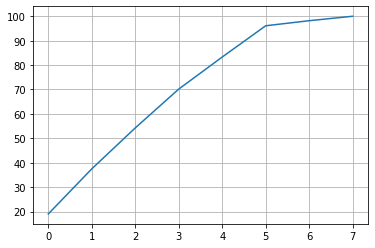

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
nband = 8
pca = PCA(n_components=nband)
pca_reduced = pca.fit_transform(scaled)

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.show()

In [5]:
# pca_recovered = pca.inverse_transform(pca_reduced[:-(9-nband)])
pca_recovered = pca.inverse_transform(pca_reduced)
pca_recovered = pca_recovered.reshape(2500, -1, 256, 256)
Y = Y.reshape(2500, -1, 256, 256)
pca_recovered = np.concatenate((pca_recovered, Y), axis=1)
print(pca_reduced.shape, pca_recovered.shape)

(9, 8) (2500, 10, 256, 256)


In [6]:
np.save(f'dataSource/pca-recovered/8.npy', pca_recovered)